## Preprocessing the data

In [1]:
import tensorflow as tf
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
from keras import layers
import librosa.display
import skimage
import pydot
import tensorflow as tf
from IPython.display import SVG
import librosa.display
import skimage

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import random


/opt/anaconda3/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
# Not using Jazz genre as there is some error in generating mel spectrograms

os.makedirs('data/spectrograms3sec')

music_genres = ['country', 'classical', 'blues', 'hiphop', 'disco', 'pop', 'rock', 'reggae']

for g in music_genres:
    path1 = os.path.join('data/audio3sec',f'{g}')
    os.makedirs(path1)
    path = os.path.join('data/spectrograms3sec',f'{g}')
    os. makedirs(path)

<Figure size 432x432 with 0 Axes>

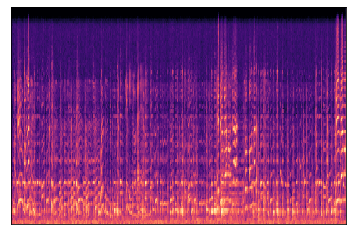

In [5]:
import librosa.display
import skimage

y, sr = librosa.load('data/genres/blues/blues.00020.wav')
mels = librosa.feature.melspectrogram(y=y,sr=sr)
plt.figure(figsize=(6,6))

fig = plt.figure()
canvas = FigureCanvas(fig)
p = librosa.display.specshow(librosa.power_to_db(mels,ref=np.max))
z = librosa.power_to_db(mels,ref=np.max)

plt.savefig('data/mel8.png')
plt.imsave('data/mel7.png',z)

In [6]:
from pydub import AudioSegment

i = 0
for g in music_genres:
    j=0
    print(f"{g}")
    for filename in os.listdir(os.path.join('data/genres',f"{g}")):

        song  =  os.path.join(f'data/genres/{g}',f'{filename}')
        j = j+1
        
        for w in range(0,10):
            i = i+1
            t1 = 3*(w)*1000
            t2 = 3*(w+1)*1000
            newAudio = AudioSegment.from_wav(song)
            new = newAudio[t1:t2]
            new.export(f'data/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

country
classical
blues
hiphop
disco
pop
rock
reggae
metal


In [7]:
!zip -r data/audio3sec.zip data/audio3sec

  adding: data/audio3sec/ (stored 0%)
  adding: data/audio3sec/pop/ (stored 0%)
  adding: data/audio3sec/pop/pop306.wav (deflated 3%)
  adding: data/audio3sec/pop/pop460.wav (deflated 2%)
  adding: data/audio3sec/pop/pop474.wav (deflated 3%)
  adding: data/audio3sec/pop/pop312.wav (deflated 3%)
  adding: data/audio3sec/pop/pop448.wav (deflated 3%)
  adding: data/audio3sec/pop/pop662.wav (deflated 5%)
  adding: data/audio3sec/pop/pop104.wav (deflated 3%)
  adding: data/audio3sec/pop/pop110.wav (deflated 7%)
  adding: data/audio3sec/pop/pop676.wav (deflated 4%)
  adding: data/audio3sec/pop/pop886.wav (deflated 3%)
  adding: data/audio3sec/pop/pop138.wav (deflated 4%)
  adding: data/audio3sec/pop/pop892.wav (deflated 3%)
  adding: data/audio3sec/pop/pop879.wav (deflated 1%)
  adding: data/audio3sec/pop/pop845.wav (deflated 8%)
  adding: data/audio3sec/pop/pop689.wav (deflated 1%)
  adding: data/audio3sec/pop/pop851.wav (deflated 15%)
  adding: data/audio3sec/pop/pop716.wav (deflated 2%)
 

country
classical
blues
hiphop
disco
pop
rock


KeyboardInterrupt: 

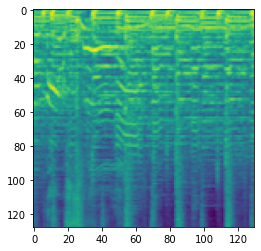

In [8]:
for g in music_genres:
    j = 0
    print(g)
    for filename in os.listdir(os.path.join('data/audio3sec',f"{g}")):
        song  =  os.path.join(f'data/audio3sec/{g}',f'{filename}')
        j = j+1
    
        y,sr = librosa.load(song,duration=3)
        #print(sr)
        mels = librosa.feature.melspectrogram(y=y,sr=sr)
        fig = plt.Figure()
        canvas = FigureCanvas(fig)
        p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
        plt.savefig(f'data/spectrograms3sec/{g}/{g+str(j)}.png')

In [8]:
directory = "data/spectrograms3sec/train/"
for g in music_genres:
    filenames = os.listdir(os.path.join(directory,f"{g}"))
    
    random.shuffle(filenames)
    test_files = filenames[0:100]
    for f in test_files:

        shutil.move(directory + f"{g}"+ "/" + f,"data/spectrograms3sec/test/" + f"{g}")